# Random Forest Generator

### How privacy and resemblance scores vary with the probability of changing a value ? 
(The proportion of artifical values)

In [1]:
data_dir = '../../../data'

datasets = {'iris': (data_dir + '/iris', 'iris'),
            'iris_1': (data_dir + '/iris_1', 'iris'),
            'iris_2': (data_dir + '/iris_2', 'iris'),
            'mimic': (data_dir + '/mimic', 'mimic'),
            'mushrooms': (data_dir + '/mushrooms', 'mushrooms'),
            'chems': (data_dir + '/chems', 'chems'),
            'credit': (data_dir + '/credit_data', 'credit'),
            'squares': (data_dir + '/squares', 'squares'),
            'squares_2': (data_dir + '/squares_2', 'squares')}

# Dataset
input_dir, basename = datasets['iris']

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sys import path

# AutoML and Comparator
main_path = '../../../'
path.append(main_path + 'code/auto_ml')
path.append(main_path + 'code/processing')
path.append(main_path + 'code/functions')
path.append(main_path + 'code/models')
path.append(main_path + 'data')
path.append(main_path + 'generators')
%matplotlib inline
%load_ext autoreload
%autoreload 2

from auto_ml import AutoML
from comparator import Comparator

# Generator
from rf_generator import RF_generator

### Train the generator

In [3]:
original_data = AutoML(input_dir, basename)
gen = RF_generator(original_data)
gen.fit()

### Generate data and compute scores

In [5]:
#gen_data = 
gen.generate_to_automl("../../../data", "iris_gen", p=1)

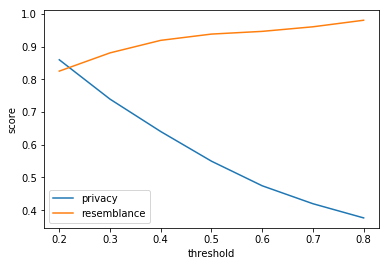

In [7]:
ps = [] # privacy
rs = [] # resemblance

thresholds = np.arange(0.2, 0.8, 0.1)

for threshold in thresholds:
        
    # Comparator for metric testing
    comparator = Comparator(original_data, AutoML('../../../data/iris_rf_1.0', 'iris_rf'))
    comparator.compute_mda(norm='manhattan', precision=0.01, threshold=threshold)

    # TODO class MDA
    (_, _), (privacy1, resemblance1), _ = comparator.mda1
    ps.append(privacy1)
    rs.append(resemblance1)
    #(_, _), (privacy2, resemblance2), _ = comparator.mda2
        
plt.plot(thresholds, ps, label='privacy')
plt.plot(thresholds, rs, label='resemblance')
plt.ylabel('score')
plt.xlabel('threshold')
plt.legend()
plt.show()

Threshold: 0.1


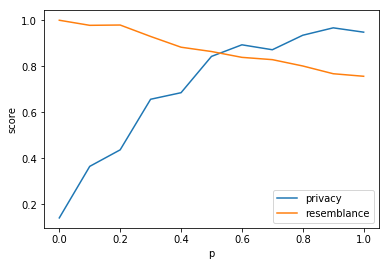

Threshold: 0.3


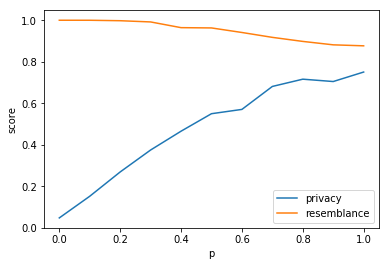

Threshold: 0.5


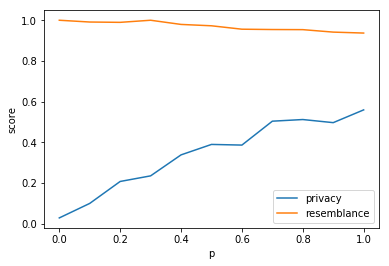

In [53]:
for threshold in [0.1, 0.3, 0.5]:
    x = np.arange(0, 1.1, 0.1)
    ps = [] # privacy
    rs = [] # resemblance
    for p in x:
        # Generation
        folder_name = '../../../data/'+basename+'_rf_'+str(p)
        gen_basename = basename+'_rf'
        ds = gen.generate_to_automl(folder_name, gen_basename, p=p)
        
        # Comparator for metric testing
        comparator = Comparator(AutoML(input_dir, basename), ds)
        comparator.compute_mda(norm='manhattan', precision=0.01, threshold=threshold)
        
        # TODO class MDA
        (_, _), (privacy1, resemblance1), _ = comparator.mda1
        ps.append(privacy1)
        rs.append(resemblance1)
        #(_, _), (privacy2, resemblance2), _ = comparator.mda2
        
    print('Threshold: {}'.format(threshold))
    plt.plot(x, ps, label='privacy')
    plt.plot(x, rs, label='resemblance')
    #plt.plot(x, ps, label='threshold='+str(threshold))
    #plt.plot(x, rs, label='threshold='+str(threshold))
    plt.ylabel('score')
    plt.xlabel('p')
    plt.legend()
    plt.show()

DS1


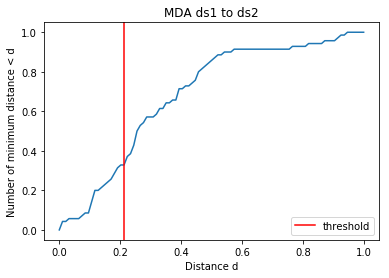

** Privacy: **0.8595238095238096

** Resemblance: **0.824903474903475

DS2


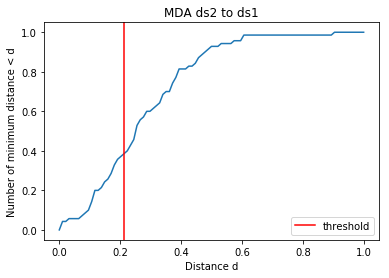

** Privacy:** 0.8505952380952382

** Resemblance:** 0.8766409266409269

DS1


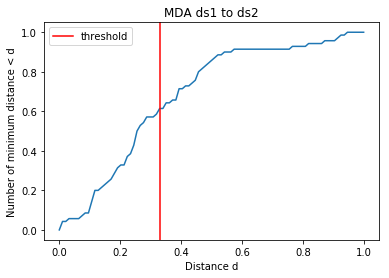

** Privacy: **0.7393241167434716

** Resemblance: **0.8806122448979592

DS2


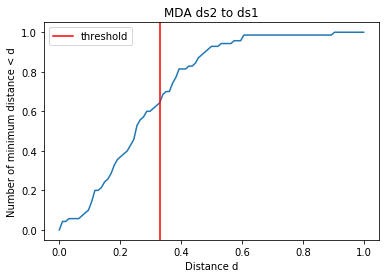

** Privacy:** 0.7213517665130569

** Resemblance:** 0.935997732426304

DS1


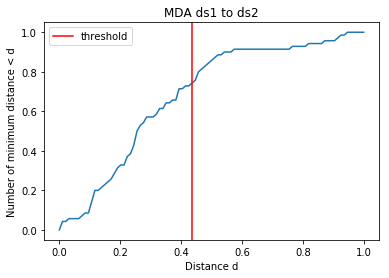

** Privacy: **0.6403019744483159

** Resemblance: **0.9188903863432165

DS2


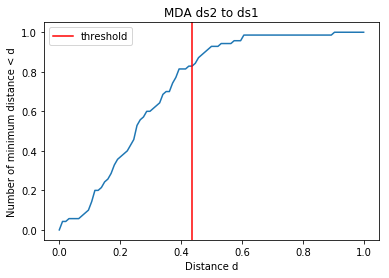

** Privacy:** 0.6083623693379792

** Resemblance:** 0.9690251572327045

DS1


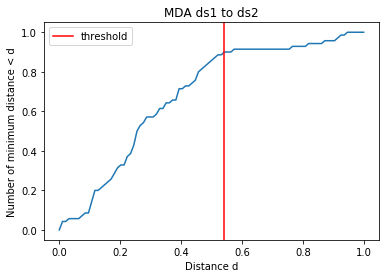

** Privacy: **0.5497665732959851

** Resemblance: **0.9380398671096346

DS2


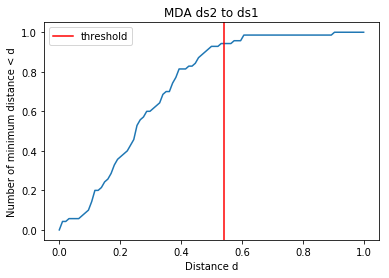

** Privacy:** 0.5103641456582634

** Resemblance:** 0.9843853820598006

DS1


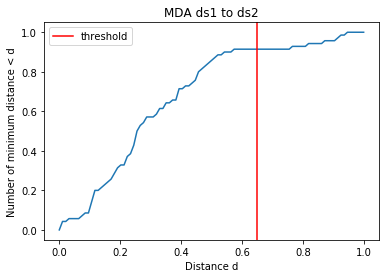

** Privacy: **0.47462919594067143

** Resemblance: **0.9463203463203462

DS2


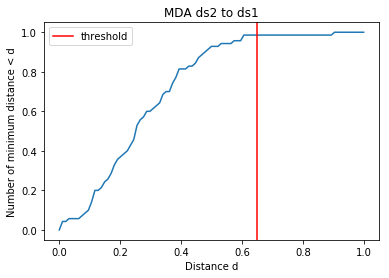

** Privacy:** 0.4328649492583918

** Resemblance:** 0.9898268398268398

DS1


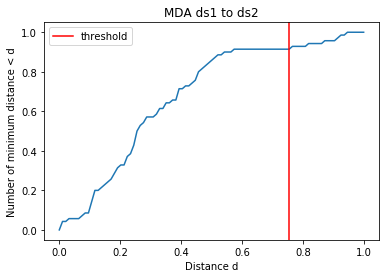

** Privacy: **0.41985244802146227

** Resemblance: **0.9603002070393377

DS2


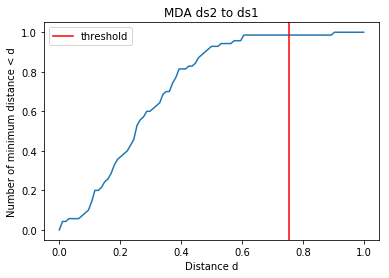

** Privacy:** 0.3739101274312542

** Resemblance:** 0.9916149068322984

DS1


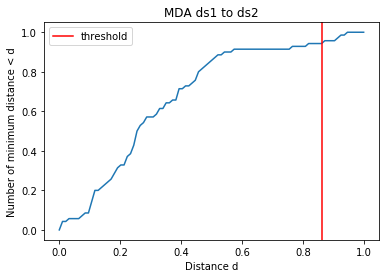

** Privacy: **0.37648442092886536

** Resemblance: **0.9803113553113552

DS2


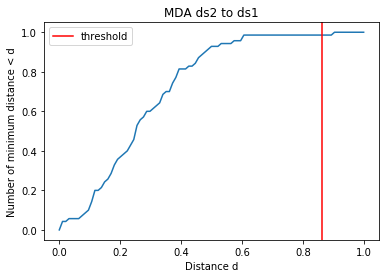

** Privacy:** 0.3295120517342739

** Resemblance:** 0.9961538461538461

In [63]:
for threshold in np.arange(0.2, 0.8, 0.1):

    #threshold = 0.4
    #x = np.arange(0, 1.1, 0.1)
    for p in [1]: #x:
        # Generation
        folder_name = '../../../data/'+basename+'_rf_'+str(p)
        gen_basename = basename+'_rf'
        ds = gen.generate_to_automl(folder_name, gen_basename, p=p)

        # Comparator for metric testing
        comparator = Comparator(AutoML(input_dir, basename), ds)
        comparator.compute_mda(norm='manhattan', precision=0.01, threshold=threshold)

        comparator.show_mda()

In [ ]:
# Other comparator functions

#comparator.show_descriptors()
#comparator.show_comparison_matrix()

#comparator.show_classifier_score()

#from sklearn.ensemble import RandomForestClassifier
#comparator.show_classifier_score(clf=RandomForestClassifier(n_estimators=200))